In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Stacked bar chart to show sales by region for each publisher in the data. 

In [2]:
df = pd.read_csv("top100videogamesales.csv")

In [3]:
publisher_sales = df.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()


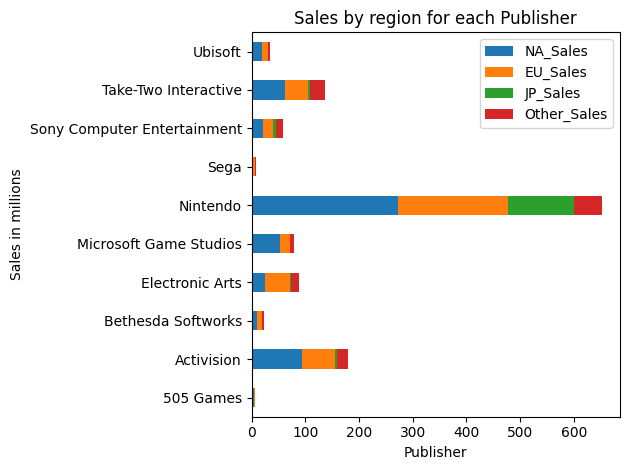

In [4]:
publisher_sales.plot(kind="barh", stacked=True)
plt.title("Sales by region for each Publisher")
plt.ylabel("Sales in millions")
plt.xlabel("Publisher")
plt.tight_layout()
plt.show()

## This is a stacked bar chart that shows the sales by region for publisher. We have North America, Japan, Europe, and Other. The sales are by the millions and as we can see Nintendo has the most sales. Following them, we have Activision and Take-Two Interactive. From the data most sales are dominated by North America. We can tell by the blue having the most in each of the bars. Japan has a good portion of sales in Japan, which is a little surprising considering how little Japan represents in other publishers. Europe has the second most sales in most of the publishers behind North America.

## Global Sales by Year with line chart

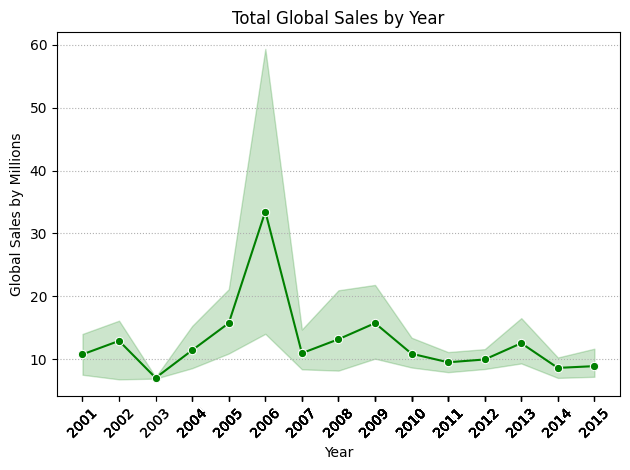

In [5]:
global_sales_by_year = df.sort_values("Year")
sns.lineplot(data=global_sales_by_year, x = "Year", y = "Global_Sales",
             marker="o", color="green")
plt.title("Total Global Sales by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales by Millions")
plt.xticks(global_sales_by_year["Year"], rotation=45)
plt.grid(True, axis='y', linestyle=':')
plt.tight_layout()
plt.show()

## We have total global sales for video games by million per year from 2001 to 2015. There is quite a spike in sales in the year 2006, but besides that the line hovers from the 10 - 15 million mark.

In [6]:
action = df[df["Genre"]=="Action"].copy()
action["Global_Sales"] = action[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum(axis=1)

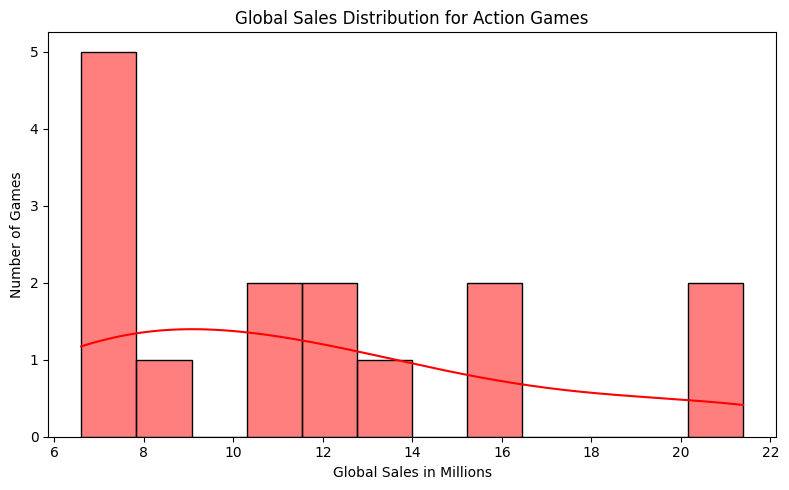

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(action["Global_Sales"], bins=12, kde=True, color="red")
plt.title("Global Sales Distribution for Action Games")
plt.xlabel("Global Sales in Millions")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

## The most common sales range for these games is about 6 to 8 million, with a few peeks from 11-13 million, and one at 16. After that there is only a couple games that sold in the 21 million range.

In [8]:
na_by_genre = df.groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False)
threshold = 0.03 * na_by_genre.sum()
total = na_by_genre.sum()
main_genres = na_by_genre[na_by_genre >= threshold]
other_genres = na_by_genre[na_by_genre < threshold]


# Add "Other" category
main_genres['Other'] = other_genres.sum()
#Genres in main
print(main_genres)
#Genres in "Other"
print("\nGenres in 'Other':")
print(other_genres)
main_genres['Other'] = other_genres.sum()
    

Genre
Shooter         140.44
Sports           84.87
Action           77.81
Misc             70.60
Racing           56.45
Platform         52.67
Role-Playing     50.48
Other            32.45
Name: NA_Sales, dtype: float64

Genres in 'Other':
Genre
Simulation    14.61
Fighting      14.40
Puzzle         3.44
Name: NA_Sales, dtype: float64


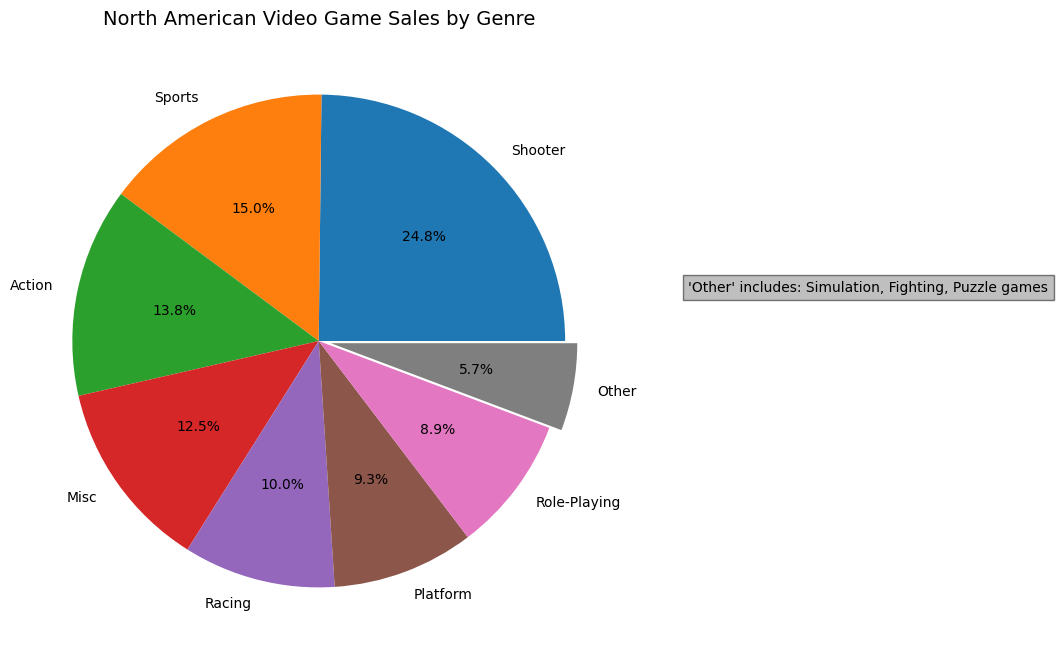

In [9]:
explode = [0.05 if genre == "Other" else 0 for genre in main_genres.index]

plt.figure(figsize=(8,8))
plt.pie(
    main_genres,
    labels=main_genres.index,
    explode=explode,
    autopct='%1.1f%%'
)
plt.title("North American Video Game Sales by Genre", fontsize=14)
other_list = ", ".join(other_genres.index.tolist())
plt.text(1.5, .2, f"'Other' includes: {other_list} games", fontsize=10, bbox=dict(facecolor='grey', alpha=0.5))


plt.show()

## In North America it appears that almost a quarter of total video game sales are shooter games. Then with 15% you have sports in second. In this order you have the rest: action, misc, racing, platform, role playing, than "other". Other is responsible for 5.7% of video game sales, and it consists of Simulation, fighting, and puzzle games.

In [10]:
eu_by_genre = df.groupby("Genre")["EU_Sales"].sum().sort_values(ascending=False)
threshold = 0.03 * eu_by_genre.sum()
total_eu = eu_by_genre.sum()
main_eu = eu_by_genre[eu_by_genre >= threshold]
other_eu = eu_by_genre[eu_by_genre < threshold]


# Add "Other" category
main_eu['Other'] = other_eu.sum()
#Genres in main
print(main_eu)
#Genres in "Other"
print("\nGenres in 'Other':")
print(other_eu)
main_eu['Other'] = other_eu.sum()

Genre
Sports          82.18
Shooter         81.63
Action          58.15
Misc            48.00
Racing          44.03
Role-Playing    36.20
Platform        33.12
Simulation      23.26
Other           10.36
Name: EU_Sales, dtype: float64

Genres in 'Other':
Genre
Puzzle      5.36
Fighting    5.00
Name: EU_Sales, dtype: float64


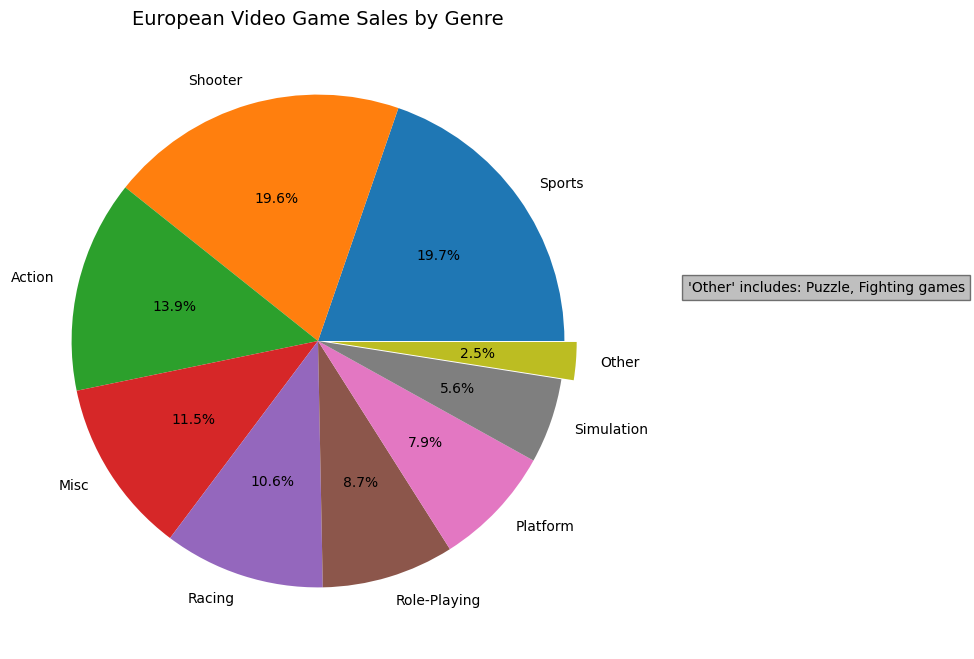

In [11]:
explode2 = [0.05 if genre == "Other" else 0 for genre in main_eu.index]

plt.figure(figsize=(8,8))
plt.pie(
    main_eu,
    labels=main_eu.index,
    explode=explode2,
    autopct='%1.1f%%'
)
plt.title("European Video Game Sales by Genre", fontsize=14)
other_list2 = ", ".join(other_eu.index.tolist())
plt.text(1.5, .2, f"'Other' includes: {other_list2} games", fontsize=10, bbox=dict(facecolor='grey', alpha=0.5))


plt.show()

## For European video game sales. You have a close fight for first with sports and shooter games. Sports takes the number one spot barely by 0.1%. Then shooter, action, misc, racing, role-playing, platform, simulation, and other in that order. For other, this category consists of puzzle and fighting games, for a total of 2.5% of video game sales in Europe.

## A similarity I notice between the North American and European video game sales is the sports and shooter games are number one and two. The difference is in NA the Shooter is number one, whereas in EU Sports take first place. The both of them have the following for third, forth, and fifth: Action, Misc, and Racing. The last quarter of the pie chart consists of Platform, Role-Playing, Simulation, Fighting, and Puzzle Games.

In [12]:
games_for_platform = df["Platform"].value_counts().sort_values(ascending=False)

games_for_platform.head()

Platform
Nintendo       46
PlayStation    34
XBox           19
Other           1
Name: count, dtype: int64

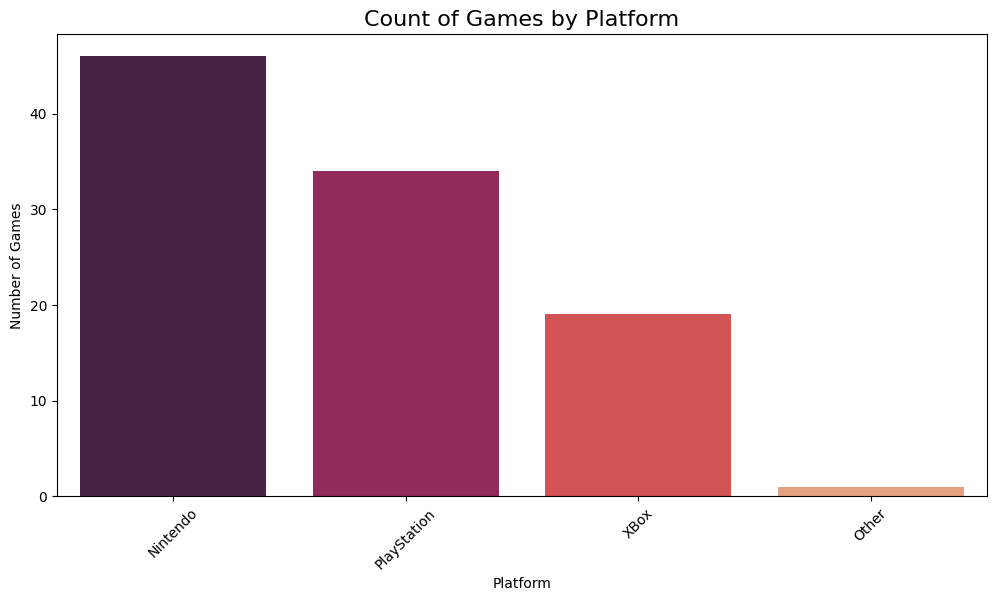

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=games_for_platform.index,
    y=games_for_platform.values,
    hue=games_for_platform.index,
    palette="rocket"
)

plt.xticks(rotation=45)
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.title("Count of Games by Platform", fontsize=16)
plt.show()


## In the bar chart above, the number of games per platform are as follows:
### Nintendo: 46
### Playstation: 34
### Xbox: 19
### Other: 1